./slurm_scripts/submit.sh  scripts/run_fineweb1B_adam_fista.sh param_configs/attn_fista_rho_mu_sweep.json small_fista  16

In [1]:
from sweep_utils import *

In [2]:
param_configs = "../param_configs/adamw_kq_all_lr.json"
script_name = "../scripts/run_fineweb1B_adam.sh"

df, _ = load_sweep_jsons(param_configs, script_name)

In [3]:
# d_conf = {model_name: (param_configs, list_scripts)}
d_conf = {"fista_st100_bv": ("../param_configs/attn_fista_rhomu_best1_lr_sweep.json" ,
                           "../scripts/run_fineweb1B_adam_fista.sh"),
          "fista_st50_bv": ("../param_configs/attn_fista_rhomu_best3_lr_sweep.json" ,
                           "../scripts/run_fineweb1B_adam_fista.sh"),
          "fista_st20_bv": ("../param_configs/attn_fista_rhomu_best5_lr_sweep.json" ,
                           "../scripts/run_fineweb1B_adam_fista.sh"),
          "fista_st20_bv_m": ("../param_configs/attn_fista_rhomu_best6_lr_sweep.json" ,
                           "../scripts/run_fineweb1B_adam_fista_momentum.sh"),
          "fista_st20_bkq_m": ("../param_configs/attn_fista_rhomu_best7_lr_sweep.json" ,
                           "../scripts/run_fineweb1B_adam_fista_momentum.sh"),
          "fista_st20_bv_mv": ("../param_configs/attn_fista_rhomu_best8_lr_sweep.json" ,
                           "../scripts/run_fineweb1B_adam_fista_momentum.sh"),
          "fista_st20_bkq_mv": ("../param_configs/attn_fista_rhomu_best9_lr_sweep.json" ,
                           "../scripts/run_fineweb1B_adam_fista_momentum.sh"),
                           }

df_fista, _ = load_sweep_jsons_all(d_conf)

In [4]:
df = pd.concat([df, df_fista], ignore_index=True)
len(df)

105

In [5]:
df[:3]

,path,final_train_loss,min_val_loss,fin_val_loss,kq_max,kq_median,kq_mean,lr,model,wd,script,attn_max_iter,attn_momentum,momentum,mu_frac,rho_over_lr,warm_start
0,/mnt/home/tparshakova/Documents/GPT-opt/output...,4.373496,4.363170,4.363170,26.75,22.875,22.623992,0.0001,gpt-small-softcap,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,/mnt/home/tparshakova/Documents/GPT-opt/output...,4.621689,4.611256,4.611256,50.00,50.000,49.957093,0.005,gpt-small-softcap,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,/mnt/home/tparshakova/Documents/GPT-opt/output...,13.480243,12.252939,16.513472,50.00,50.000,49.974997,0.5,gpt-small-softcap,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df[df["model"]=="gpt-small-default"][["lr", "min_val_loss"]].sort_values("min_val_loss")

,lr,min_val_loss
43,0.001,3.988897
37,0.0005,3.994627
33,0.0001,4.361649
38,5e-05,4.819427
42,1e-05,5.867361
34,0.005,6.774294
39,0.01,6.860291
40,0.1,6.869065
36,0.05,7.153021
35,0.5,114.613625


In [7]:
df[df["lr"]=='0.001'][["model", "min_val_loss", "kq_max", "lr"]]

,model,min_val_loss,kq_max,lr
10,gpt-small-softcap,3.993957,50.000,0.001
21,gpt-small-lnorm,3.949166,17.125,0.001
32,gpt-small-w-clip,3.981357,109.000,0.001
43,gpt-small-default,3.988897,318.000,0.001
56,fista_st20_bkq_m,4.758358,16.625,0.001
57,fista_st100_bv,3.985099,1296.000,0.001
58,fista_st20_bkq_mv,4.708824,20.250,0.001
59,fista_st20_bv,3.978792,1536.000,0.001
60,fista_st20_bv_m,4.015273,4000.000,0.001
61,fista_st50_bv,3.964075,1020.000,0.001


(<Figure size 600x400 with 1 Axes>,
 <Axes: xlabel='Learning Rate', ylabel='Minimum Validation Loss'>)

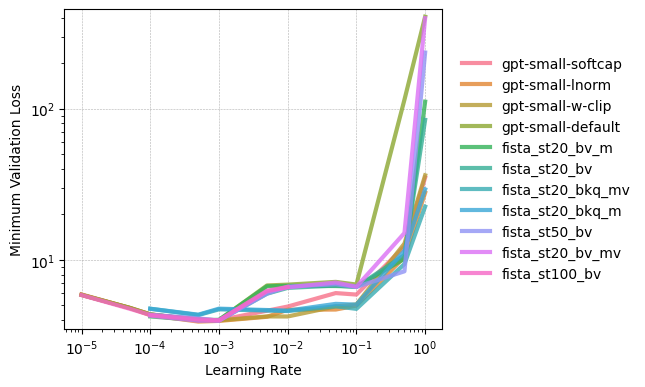

In [8]:
plot_lr_sweep_over_models(df, ycol="min_val_loss", ylog=True)

(<Figure size 600x400 with 1 Axes>,
 <Axes: xlabel='Learning Rate', ylabel='Minimum Validation Loss'>)

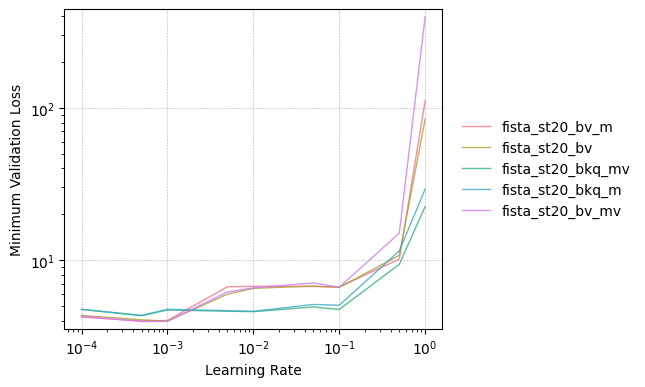

In [22]:
plot_lr_sweep_over_models(df[df["model"].str.contains("fista_st20")], ycol="min_val_loss", ylog=True, linewidth=1)

(<Figure size 600x400 with 1 Axes>,
 <Axes: xlabel='Learning Rate', ylabel='Maximum KQ Value'>)

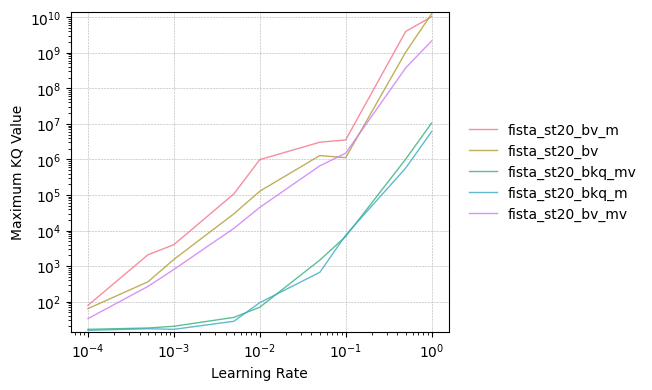

In [10]:
plot_lr_sweep_over_models(df[df["model"].str.contains("fista_st20")], ycol="kq_max", ylog=True,
                          alpha=0.8, linewidth=1.0)

(<Figure size 600x400 with 1 Axes>,
 <Axes: xlabel='Learning Rate', ylabel='Minimum Validation Loss'>)

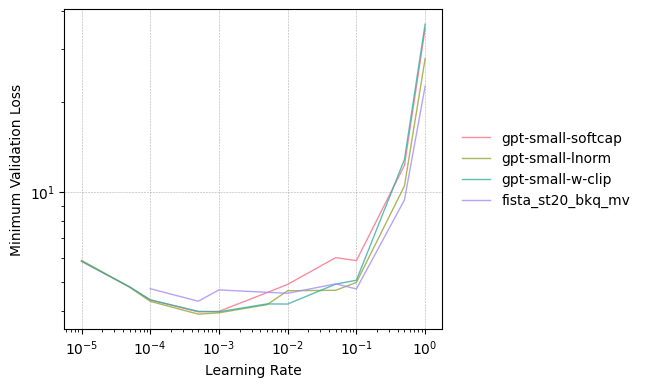

In [18]:
plot_lr_sweep_over_models(df[df["model"].isin(['gpt-small-softcap', 'gpt-small-lnorm', 'gpt-small-w-clip', 
                                            #    'gpt-small-default', 
                                               'fista_st20_bkq_mv'])], ycol="min_val_loss", ylog=True, linewidth=1)

(<Figure size 600x400 with 1 Axes>,
 <Axes: xlabel='Learning Rate', ylabel='Maximum KQ Value'>)

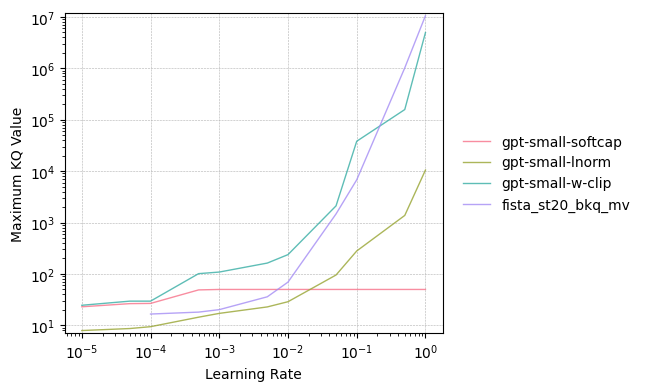

In [21]:
plot_lr_sweep_over_models(df[df["model"].isin(['gpt-small-softcap', 'gpt-small-lnorm', 'gpt-small-w-clip', 
                                            #    'gpt-small-default', 
                                               'fista_st20_bkq_mv'])], ycol="kq_max", ylog=True, linewidth=1)